# NLP with Python
**Using labelled score 1 (for positive) or 0 (for negative) will train machine learning model to learn to discriminate between 1/0 automatically**

## Loading data

Using rstrip  to get list of messages

In [3]:
amazon = [line.rstrip() for line in open('amazon_cells_labelled.txt')]

Printing number and messages using enumerate

In [6]:
for ama_no, mess in enumerate(amazon[:10]):
    print(ama_no, mess)

0 So there is no way for me to plug it in here in the US unless I go by a converter.	0
1 Good case, Excellent value.	1
2 Great for the jawbone.	1
3 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
4 The mic is great.	1
5 I have to jiggle the plug to get it to line up right to get decent volume.	0
6 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
7 If you are Razr owner...you must have this!	1
8 Needless to say, I wasted my money.	0
9 What a waste of money and time!.	0


As we see above this is tab seperate file, we can use sep argument in read csv

In [105]:
import pandas as pd
import numpy as np

Adding amazon, yelp, imdb messages to list and then concating the list

In [176]:
files = {'amazon': 'amazon_cells_labelled.txt', 
        'yelp':'yelp_labelled.txt', 
        'imdb': 'imdb_labelled.txt'}
df_list = []
for k,v in files.items():
    path = v
    df = pd.read_csv(path, names=['message', 'label'], sep='\t')
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

In [177]:
df.head()

,message,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [178]:
df.shape

(3000, 2)

Creating new column 'length' to detect the length of txt message

In [109]:
df['length'] = df['message'].apply(len)

In [110]:
df.head(3)

,message,label,length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22


## Exploratory data analysis

importing visualization libraries

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)
plt.rcParams['font.size']=16
plt.style.use('seaborn-whitegrid')

(0.0, 500.0)

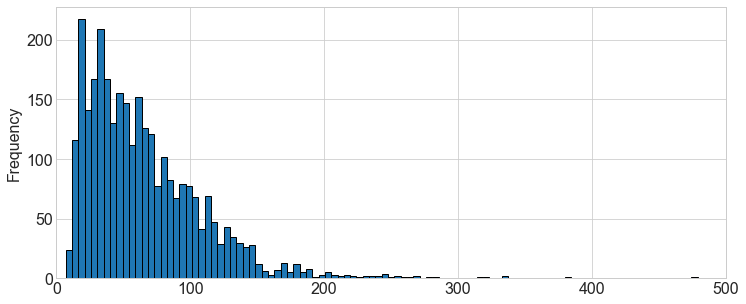

In [119]:
df['length'].plot(kind='hist', bins=100, ec='black')
plt.xlim(0,500)

In [113]:
df['length'].describe()

count    3000.000000
mean       65.267667
std        44.162557
min         7.000000
25%        33.000000
50%        55.500000
75%        88.000000
max       479.000000
Name: length, dtype: float64

479 characters is maximum length of message

In [115]:
df[df['length']==479.000000]['message'][620]

"This is a masterful piece of film-making, with many themes simmering and occasionally boiling over in this warts and all study of the poet's bohemian, self-indulgent wartime years that span the aerial bombardments of London and the outward tranquillity of a Welsh coastal retreat - the borderlines between friendship, lust and love, dedication to art and experience versus practical concerns, jealousy, rivalry, cowardice and egotism versus heroism and self-sacrifice and more.  "

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014734F98>,
      dtype=object)

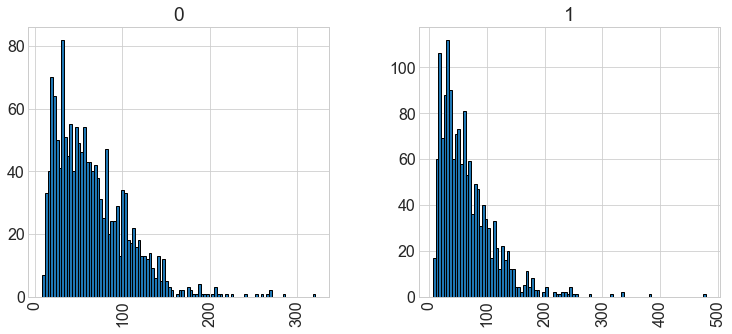

In [120]:
df.hist('length', by='label', ec='black', bins = 100)

From above plots we can confirm that for both positive and negative messages have character length between 0-100

In [125]:
df.groupby('label').describe()

length                                                    
        count       mean        std  min   25%   50%   75%    max
label                                                            
0      1500.0  64.886000  41.403460  8.0  33.0  56.0  88.0  321.0
1      1500.0  65.649333  46.769926  7.0  32.0  55.0  87.0  479.0

## Text pre processing
Converting raw messages into vectors

Will proceed with removing punctuation and stop words

In [224]:
## Testing with sample message before proceeding with function
string1 = 'DELETE.. this, film from your mind!'

In [128]:
import string

In [129]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Check for punctuation and join the string

In [166]:
string1_punc = ''.join([i for i in string1.lower() if i not in string.punctuation])

Importing stopwords from nltk to remove englis stopwords

In [133]:
from nltk.corpus import stopwords

In [167]:
[i for i in string1_punc.split() if i.lower() not in stopwords.words('english')]

['delete', 'film', 'mind']

In [170]:
## Define function to remove punctuation and stop words

def clean_text(x):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean words    
    """
    string_punc = ''.join([i for i in x.lower() if i not in string.punctuation])
    string_clean = [i for i in string_punc.split() if i.lower() not in stopwords.words('english')]
    return string_clean

Tokenize the message

In [182]:
df['message'].head(5).apply(clean_text)

0               [way, plug, us, unless, go, converter]
1                       [good, case, excellent, value]
2                                     [great, jawbone]
3    [tied, charger, conversations, lasting, 45, mi...
4                                         [mic, great]
Name: message, dtype: object

## Vectorization

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
count_vector = CountVectorizer(analyzer=clean_text).fit(df['message'])

In [186]:
## Will transform just one text message

mess2 = df['message'][1]
cv2 = count_vector.transform([mess2])
print(cv2)
print(cv2.shape)

  (0, 740)	1
  (0, 1639)	1
  (0, 2041)	1
  (0, 4973)	1
(1, 5277)


We have 4 unique words in mess2

In [195]:
count_vector.get_feature_names()[1639]

'excellent'

use **.transform** bag of words to transform the entire dataframe of messages

In [196]:
df_bow = count_vector.transform(df['message'])

In [198]:
print('shape of sparse matrix:{}'.format(df_bow.shape))
print('Number of non zero occurance:{}'.format(df_bow.nnz))

shape of sparse matrix:(3000, 5277)
Number of non zero occurance:18280


Importing TF_IDF for weighting and normalization

In [200]:
from sklearn.feature_extraction.text import TfidfTransformer

In [201]:
tfidf = TfidfTransformer().fit(df_bow)

In [208]:
tfidf2 = tfidf.transform(cv2)

In [209]:
print(tfidf2)

  (0, 4973)	0.6331376147172262
  (0, 2041)	0.33764566462197293
  (0, 1639)	0.47185631620699964
  (0, 740)	0.5123317117334505


Checking IDF of word 'good'

In [203]:
tfidf.idf_[count_vector.vocabulary_['good']]

3.631422437756202

Transforming entire bag-of-words corpus into TF-IDF corpus

In [204]:
df_tfidf = tfidf.transform(df_bow)

In [205]:
print(df_tfidf.shape)

(3000, 5277)


## Training model
**Text Classification using Naive Bayes**

In [206]:
from sklearn.naive_bayes import MultinomialNB

In [207]:
nb = MultinomialNB().fit(df_tfidf, df['label'])

In [211]:
nb.predict(tfidf2)[0]

1

In [212]:
df['label'][1]

1

From above prediction we can see that we have model is working correctly

Now we ill check how our model works on entire dataset

In [213]:
nb_predict = nb.predict(df_tfidf)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix

In [216]:
print(classification_report(df['label'], nb_predict))
print('\n')
print(confusion_matrix(df['label'], nb_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1500
           1       0.95      0.95      0.95      1500

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



[[1429   71]
 [  70 1430]]


We have accuracy of 0.95, but please note still we have split training and testing data. Will proceed further

## Train test split

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
message_train, message_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=101)

## Creating data pipeline

Using pipeline from Scikit learn to store workflow

In [219]:
from sklearn.pipeline import Pipeline

In [220]:
pipeline = Pipeline([('bow', CountVectorizer()),
         ('tfidf', TfidfTransformer()),
         ('classifier', MultinomialNB())])

Pass train data and pipelone will do the preprocessing for us

In [221]:
pipeline.fit(message_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [222]:
final_predict = pipeline.predict(message_test)

In [223]:
print(classification_report(label_test, final_predict))
print('\n')
print(confusion_matrix(label_test, final_predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       460
           1       0.79      0.82      0.81       440

    accuracy                           0.81       900
   macro avg       0.81      0.81      0.81       900
weighted avg       0.81      0.81      0.81       900



[[364  96]
 [ 78 362]]
